In [ ]:
#PROBLEM STATEMENT & OBJECTIVE OF ANALYSIS ON CHATGPT REVIEWS

#The objective of this project is to analyze ChatGPT customer reviews and understand overall user sentiment, satisfaction level, and common feedback themes using data analysis and visualization techniques.
#Customer reviews provide real user experience and feedback.


In [ ]:
#REASON OF BELOW ANALYSIS:

#What is the overall user sentiment toward ChatGPT?

#Are users satisfied or dissatisfied?

#What features do users appreciate most?

#What common complaints exist?

#Do ratings match sentiment?


In [ ]:
#BENEFITS OF ANALYSIS

#Measure customer satisfaction

#Identify strengths and weaknesses

#Improve product quality

#Make data-driven decisions

#For AI tools like ChatGPT, understanding user sentiment helps improve accuracy, usability, and performance.

In [ ]:
#STEP 1- FIRST WE LOAD THE DATA & UNDERSTAND IT

# ===============================
# DATA LOADING
# ===============================

#This step loads the dataset into Python so we can analyze it.

import pandas as pd
df= pd.read_csv('/content/chatgpt_reviews (1).csv')
print(df)
# Executing this cell to define 'df'

                                   Review Id  \
0       6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1       81caeefd-3a28-4601-a898-72897ac906f5   
2       452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3       372a4096-ee6a-4b94-b046-cef0b646c965   
4       b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   
...                                      ...   
196722  462686ff-e500-413c-a6b4-2badc2e3b21d   
196723  f10e0d48-ecb6-42db-b103-46c0046f9be9   
196724  df909a49-90b5-4dac-9b89-c4bd5a7c2f75   
196725  abe43878-973f-4e96-a765-c4af5c7f7b20   
196726  0151001d-b81c-41b5-8927-f56738989625   

                                                   Review  Ratings  \
0                                                    good        5   
1                                                    good        5   
2                                                nice app        5   
3                                                nice, ig        5   
4       this is a great app, the bot is so accurate to...        5   
...

In [ ]:
#STEP 2- NEXT WE WILL LOAD THE LIABRARIES WE REQUIRE FOR THIS ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud


#pandas → used for data handling
#matplotlib & seaborn → charts/graphs
#textblob → sentiment analysis
#wordcloud → keyword visualization
#re → text cleaning (remove symbols)
#We install them so Python can use them.

In [ ]:
# Now we have loaded the Dataset with Top 5 rows.

df = pd.read_csv("/content/chatgpt_reviews (1).csv")
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [ ]:
#STEP-3 : DATA CLEANING
#Before proceeding further we have gto check for any missing/ null values or rows etc.

#Real-world data contains missing values and incorrect formats.
#Cleaning ensures accurate analysis.

# ===============================
# DATA CLEANING
# ===============================

df.info()

df.columns = df.columns.str.lower().str.replace(" ", "_")   #Column headings were corrected here.

df['review'] = df['review'].fillna("No Review")  #If review text is empty then fill with "No Review".

df['ratings'] = pd.to_numeric(df['ratings'])  #Converting ratings into numbers.

df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')   #Converting date column into proper date format.

df = df.dropna()
df.reset_index(drop=True, inplace=True)   #Remove rows with missing values and reset index.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
#STEP 4 - TEXT CLEANING (PREPROCESSING)

# ===============================
# TEXT CLEANING
# ===============================

#This function Converts text to lowercase and  removes numbers, punctuation, Symbols, emoticons & extra spaces.
#Clean text helps sentiment analysis work properly.
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['clean_review'] = df['review'].apply(clean_text)


In [ ]:
#STEP 5- ANALYTICAL METHODS USED

#Analysis 1- Sentiment Ananlysis

# ===============================
# SENTIMENT ANALYSIS
# ===============================

#We used TextBlob for sentiment analysis.

from textblob import TextBlob

df['polarity'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

#TextBlob is suitable because as it is easy and accurate for text sentiment, works well for review data, gives polarity and subjectivity scores.
#Polarity range:(-1 = Negative, 0 = Neutral, +1 = Positive)
#Subjectivity: (0 = factual, 1 = opinion-based)

In [ ]:
#Analysis 2- Sentiment Classification

# ===============================
# SENTIMENT CLASSIFICATION
# ===============================

def label(score):
    if score > 0:
        return "Positive"
    elif score == 0:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['polarity'].apply(label)

# So we created sentiment label.
#We converted numbers into labels: positive, neutral, negative.
#This is easy to understand in charts.

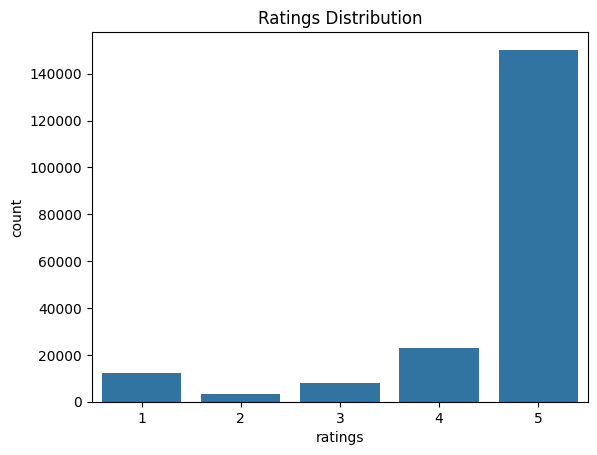

In [ ]:
#STEP 6- EXPLORATORY DATA ANALYSIS (EDA)

#EDA helps understand patterns before applying analysis.

#1 EDA- Ratings Distribution

# ===============================
# RATINGS DISTRIBUTION
# ===============================

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='ratings', data=df)
plt.title("Ratings Distribution")
plt.show()

#Interpretation

#This chart shows how users rated ChatGPT. If most ratings are 4 and 5 then users have high satisfaction and if we have low ratings then dissatisfaction.
#Here, Majority of users gave high ratings, indicating strong satisfaction.

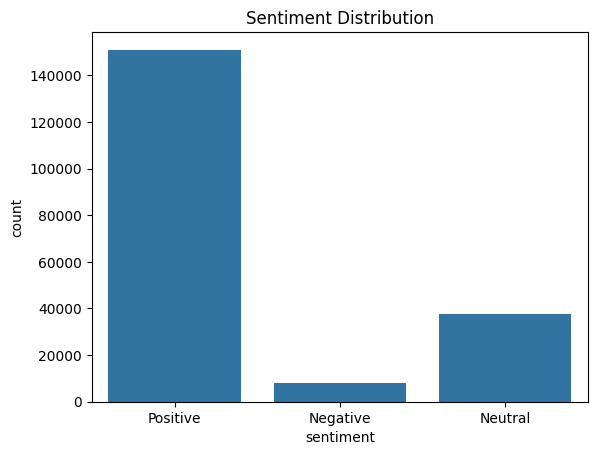

In [ ]:
#2 EDA- Sentiment Distribution

# ===============================
# SENTIMENT DISTRIBUTION
# ===============================

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

#Interpretation
# It shows number of positive, neutral, and negative reviews.
#Here, most reviews are positive, showing overall good user experience.

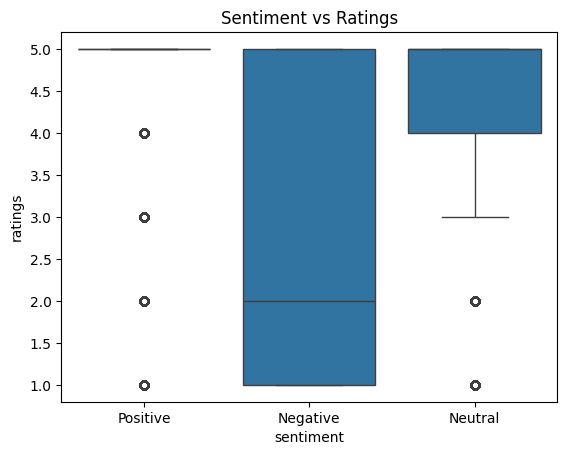

In [ ]:
#3 EDA- Sentiment Vs Ratings

# ===============================
# SENTIMENT VS RATINGS
# ===============================

sns.boxplot(x='sentiment', y='ratings', data=df)
plt.title("Sentiment vs Ratings")
plt.show()

#This chart shows the relationship between user sentiment and ratings.
#Positive sentiment reviews mostly have high ratings (4–5), indicating strong user satisfaction.
#Negative sentiment shows a wide range of ratings, meaning some users give high ratings but still mention issues.
#Neutral sentiment generally has moderate to high ratings.

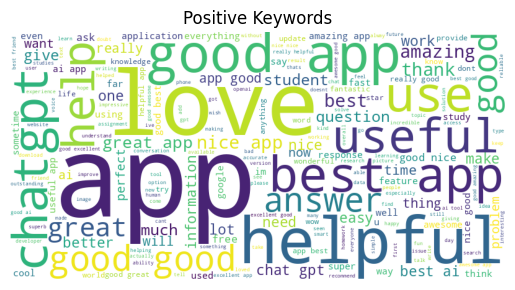

In [ ]:
#STEP 7- PRESENTING INSIGHTS

# ===============================
# POSITIVE FEEDBACK KEYWORDS
# ===============================

#Presentation 1- Positive Feedback Keywords

from wordcloud import WordCloud

positive_text = " ".join(df[df['sentiment']=="Positive"]['clean_review'])

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(positive_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive Keywords")
plt.show()

#Shows common positive words like: great, helpful, amazing

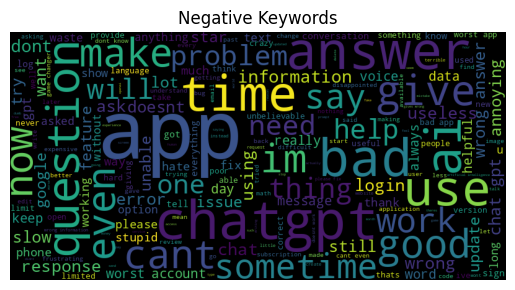

In [ ]:
#Presentation 2- Negative Feedback Keywords

# ===============================
# NEGATIVE FEEDBACK KEYWORDS
# ===============================

negative_text = " ".join(df[df['sentiment']=="Negative"]['clean_review'])

wordcloud2 = WordCloud(width=800,height=400,background_color='black').generate(negative_text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.title("Negative Keywords")
plt.show()

#Shows common complaints: error, slow, problem

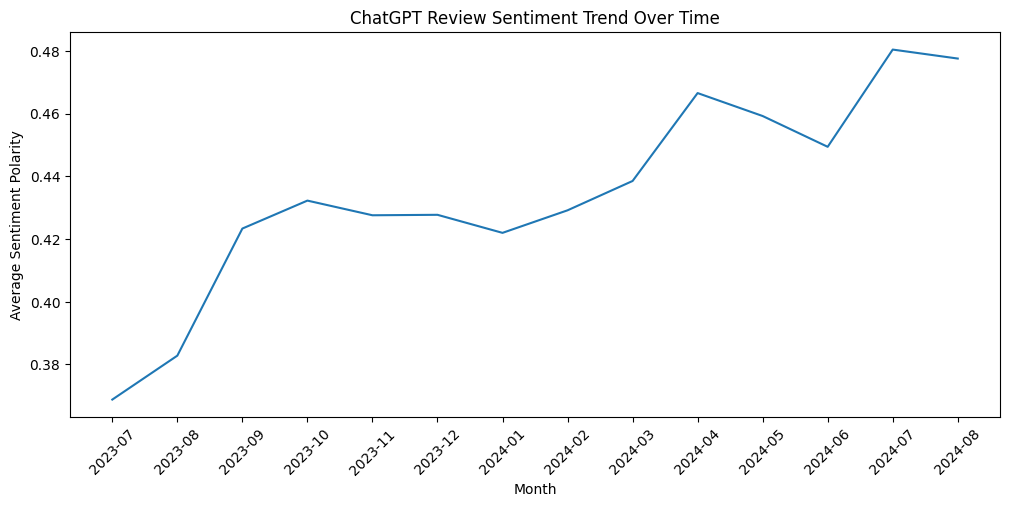

In [ ]:
#Presentation 3- Time Series Analysis
#We have see now how sentiments change over time.

# ===============================
# TIME SERIES SENTIMENT ANALYSIS
# ===============================

# CREATE MONTH-YEAR COLUMN
df['month_year'] = df['review_date'].dt.to_period('M')

# AVERAGE SENTIMENT PER MONTH
monthly_sentiment = df.groupby('month_year')['polarity'].mean().reset_index()

# convert to string for plotting
monthly_sentiment['month_year'] = monthly_sentiment['month_year'].astype(str)

# PLOT TIME SERIES GRAPH
plt.figure(figsize=(12,5))
plt.plot(monthly_sentiment['month_year'], monthly_sentiment['polarity'])
plt.xticks(rotation=45)
plt.title("ChatGPT Review Sentiment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Polarity")
plt.show()

In [ ]:
#STEP 8- FINAL OVERALL ANALYSIS & INTERPRETATION

#1) Customer Sentiment Overview -Majority of reviews are positive, users find ChatGPT helpful and easy to use which indicates strong market acceptance

#2) Key Positive Drivers- Most common positive themes are Productivity improvement, Fast responses, Learning & coding help and Content generation so ChatGPT is seen as a productivity & knowledge tool

#3) Key Negative Feedback- Common complaints are Occasional incorrect answers, Usage limits, Slow response sometimes, App glitches

#4) Ratings Insight- If ratings mostly 4 & 5 are High satisfaction, Strong user retention and Good brand loyalty.

#5) Word Cloud Insights Frequently used words show - Users rely on ChatGPT for learning & work.

#FINAL BUSINESS CONCLUSION

#We analyzed ChatGPT customer reviews using Python sentiment analysis and visualization.
#The majority of reviews are positive, showing strong satisfaction.
#Users appreciate productivity, learning support, and ease of use.
#However, some concerns exist around accuracy and performance.
#Overall, ChatGPT has strong market acceptance with opportunities for improvement in reliability and advanced features.

In [ ]:
df.to_csv("Final1_ChatGPT.csv", index=False)
from google.colab import files
files.download("Final1_ChatGPT.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>